In [1]:
import csv
import math
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics


In [2]:
# read data into memory
y_data = np.genfromtxt("hw01_class_labels.csv", delimiter = ",")
x_data = np.genfromtxt('hw01_data_points.csv', delimiter = ",",dtype=str)

# get x and x_test values
x_test = x_data[300:]
x      = x_data[:300]

# get y and y_test values
y_test = y_data[300:].astype(int)
y      = y_data[:300].astype(int)

# get number of samples
N_tr = y.shape[0] #300
N_test = y_test.shape[0] #100
M=x.shape[1] #7
K = np.max(y).astype(int) #2

In [3]:
#Frequencies of classes
z=[np.sum(y[y == (c + 1)]== (c+1))for c in range(K)]
print(z)
#Estimated model parameters
pAcd=[[np.sum((x[y == (c + 1)][a][d]=='A' )/z[c]  for a in range (z[c])) for d in range(M)] for c in range(K)]
pCcd=[[np.sum((x[y == (c + 1)][a][d]=='C' )/z[c] for a in range (z[c])) for d in range(M)] for c in range(K)]
pGcd=[[np.sum((x[y == (c + 1)][a][d]=='G' )/z[c]  for a in range (z[c])) for d in range(M)] for c in range(K)]
pTcd=[[np.sum((x[y == (c + 1)][a][d]=='T' )/z[c] for a in range (z[c])) for d in range(M)] for c in range(K)]
print(pAcd)
print(pCcd)
print(pGcd)
print(pTcd)

[150, 150]
[[0.27999999999999975, 0.6800000000000005, 0.09333333333333334, 0.5666666666666664, 0.6800000000000005, 0.13999999999999999, 0.19333333333333322], [0.2266666666666665, 0.2399999999999998, 0.26666666666666644, 0.18666666666666656, 0.20666666666666653, 0.1799999999999999, 0.2599999999999998]]
[[0.3999999999999995, 0.08666666666666667, 0.013333333333333334, 0.02, 0.12000000000000001, 0.060000000000000005, 0.08], [0.15999999999999995, 0.23333333333333314, 0.09333333333333334, 0.17333333333333326, 0.21333333333333318, 0.26666666666666644, 0.19333333333333322]]
[[0.21333333333333318, 0.09333333333333334, 0.8266666666666681, 0.35333333333333294, 0.1, 0.760000000000001, 0.20666666666666653], [0.29333333333333306, 0.2733333333333331, 0.2266666666666665, 0.3599999999999996, 0.19999999999999987, 0.23333333333333314, 0.19999999999999987]]
[[0.10666666666666667, 0.13999999999999999, 0.06666666666666667, 0.060000000000000005, 0.1, 0.04, 0.5199999999999995], [0.3199999999999997, 0.25333333

C:\Users\90536\AppData\Local\Temp\ipykernel_14552\470051020.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pAcd=[[np.sum((x[y == (c + 1)][a][d]=='A' )/z[c]  for a in range (z[c])) for d in range(M)] for c in range(K)]
C:\Users\90536\AppData\Local\Temp\ipykernel_14552\470051020.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pCcd=[[np.sum((x[y == (c + 1)][a][d]=='C' )/z[c] for a in range (z[c])) for d in range(M)] for c in range(K)]
C:\Users\90536\AppData\Local\Temp\ipykernel_14552\470051020.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pGcd=[[np.sum((x[y == (c + 1)][a][d]==

In [4]:
# calculate prior probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
print(class_priors )

[0.5, 0.5]


In [5]:
# evaluate score functions
score_values = np.stack([ [np.sum(np.log
                                   ((pAcd[c][d]**(x[a][d]=='A' ))*(pCcd[c][d]**(x[a][d]=='C' ))*(pGcd[c][d]**(x[a][d]=='G' ))*(pTcd[c][d]**(x[a][d]=='T' )))
                                   for d in range(M)) for a in range (N_tr)] + np.log(class_priors[c])
                         for c in range(K)])
#print(score_values)


C:\Users\90536\AppData\Local\Temp\ipykernel_14552\483688132.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score_values = np.stack([ [np.sum(np.log


In [6]:
#Define actual and predicted class values for data points of training set.
actual=y
predicted= np.repeat(0, N_tr)
for i in range (N_tr):
        predicted[i]=int(score_values[0][i]<score_values[1][i])+1

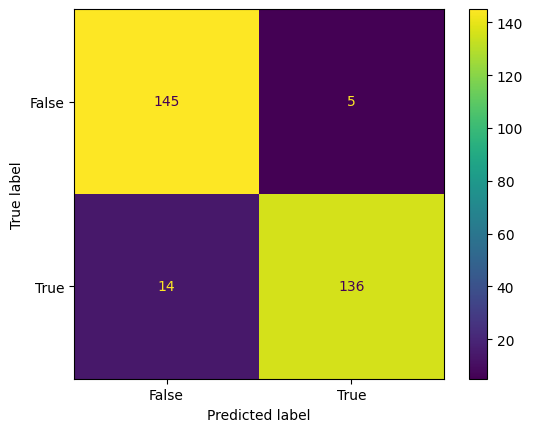

In [7]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\90536\AppData\Local\Temp\ipykernel_14552\160384842.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score_values_test = np.stack([ [np.sum(np.log


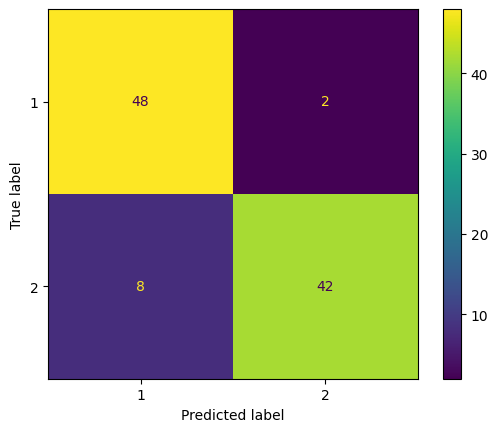

In [8]:
#Calculate score values of test data set.
score_values_test = np.stack([ [np.sum(np.log
                                   ((pAcd[c][d]**(x_test[a][d]=='A' ))*(pCcd[c][d]**(x_test[a][d]=='C' ))*(pGcd[c][d]**(x_test[a][d]=='G' ))*(pTcd[c][d]**(x_test[a][d]=='T' )))
                      for d in range(M) ) for a in range (N_test)] + np.log(class_priors[c])
                         for c in range(K)])

#Define actual and predicted class values for data points of test data set.
predicted_test= np.repeat(0, N_test)
for i in range (N_test):
        predicted_test[i]=int(score_values_test[0][i]<score_values_test[1][i])+1

confusion_matrix = metrics.confusion_matrix(y_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2])
cm_display.plot()
plt.show()

In [11]:
def create_confusion(actual,predicted,N):
    confusion_train=np.zeros((2,2),dtype=int)
    for i in range (N):
        if(predicted[i]==actual[i]):
            confusion_train[actual[i]-1][actual[i]-1]=confusion_train[actual[i]-1][actual[i]-1]+1
        else:
            confusion_train[predicted[i]-1][actual[i]-1]=confusion_train[predicted[i]-1][actual[i]-1]+1
    print("y_truth   1   2 \ny_pred \n1\t",confusion_train[0], "\n2\t",confusion_train[1],"\n")

In [12]:
print("Confusion Matrix for training set")
create_confusion(y,predicted,N_tr)
print("Confusion Matrix for test set")
create_confusion(y_test,predicted_test,N_test)

Confusion Matrix for training set
y_truth   1   2 
y_pred 
1	 [145  14] 
2	 [  5 136] 

Confusion Matrix for test set
y_truth   1   2 
y_pred 
1	 [48  8] 
2	 [ 2 42] 

